# Extract from EDA export

This notebook is to develop the functions for extracting the contents of NC3Rs Experimental Design Assistant (EDA) export directly into Python. This file comes compressed, and I previously developed code to work with the extracted `model` file that contains the JSON. 

First, just a look at the `sample_eda` folder...

In [1]:
!ls sample_eda/

 Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/
'Template 1 - Two-group comparison _ Animal as experimental unit _ Complete randomisation.eda'
'Template 2 - Crossover _ Blocking factor _ Order of treatments _ Test period.eda'
'Template 3 - Multiple animal characteristics _ No randomisation _ Data transformation _ Multiple time points _ Multiple outcome measures _ Sex and genotype as factors of interest _ Two-way ANOVA with interaction.eda'
'Template 4 - Randomisation with sex as a factor of interest _ Nuisance variable _ Nested variable _ Two-way ANOVA with interaction _ Data averaged per animal _ Multiple animal characteristics.eda'
'Template 5 - Three-group comparison _ Blocking factor _ Block randomisation _ Two-way ANOVA without interaction _ Data transformation.eda'


In [2]:
import zipfile
from pathlib import Path

def extract_model(fname):
    _ifp = Path(fname).absolute()
    if not _ifp.is_file():
        print("ERROR: Path does not lead to file!")
        exit()
    _ofp = _ifp.parent.joinpath(str(_ifp.stem).replace(' ','_').replace('__','_'))
    with zipfile.ZipFile(_ifp, 'r') as zip_ref:
        zip_ref.extractall(_ofp)
    if not _ofp.is_dir():
        print("ERROR: Output directory not created properly.")

We can then extract a specified `.eda` like this:

In [3]:
fname = "sample_eda/Template 1 - Two-group comparison _ Animal as experimental unit _ Complete randomisation.eda"
extract_model(fname)

and I can see the extracted folder and file that comes out:

In [4]:
print("\nsample_eda/\n")
!ls sample_eda/
print("\nsample_eda/Template_1_-...\n")
!ls sample_eda/Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/


sample_eda/

 Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/
'Template 1 - Two-group comparison _ Animal as experimental unit _ Complete randomisation.eda'
'Template 2 - Crossover _ Blocking factor _ Order of treatments _ Test period.eda'
'Template 3 - Multiple animal characteristics _ No randomisation _ Data transformation _ Multiple time points _ Multiple outcome measures _ Sex and genotype as factors of interest _ Two-way ANOVA with interaction.eda'
'Template 4 - Randomisation with sex as a factor of interest _ Nuisance variable _ Nested variable _ Two-way ANOVA with interaction _ Data averaged per animal _ Multiple animal characteristics.eda'
'Template 5 - Three-group comparison _ Blocking factor _ Block randomisation _ Two-way ANOVA without interaction _ Data transformation.eda'

sample_eda/Template_1_-...

model


Now I've added these to the `nc3rsEDA` package, so I can do it at the start using `ned.Graph`.

First, let's clean up the extraction run above and take another look at `sample_eda/`.

In [5]:
!rm -r sample_eda/Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/
!ls sample_eda/

'Template 1 - Two-group comparison _ Animal as experimental unit _ Complete randomisation.eda'
'Template 2 - Crossover _ Blocking factor _ Order of treatments _ Test period.eda'
'Template 3 - Multiple animal characteristics _ No randomisation _ Data transformation _ Multiple time points _ Multiple outcome measures _ Sex and genotype as factors of interest _ Two-way ANOVA with interaction.eda'
'Template 4 - Randomisation with sex as a factor of interest _ Nuisance variable _ Nested variable _ Two-way ANOVA with interaction _ Data averaged per animal _ Multiple animal characteristics.eda'
'Template 5 - Three-group comparison _ Blocking factor _ Block randomisation _ Two-way ANOVA without interaction _ Data transformation.eda'


Now if I use `fname` with the assigned `.eda`, it automatically generates the folder during extraction and then handles everything else the same. 

In [6]:
import nc3rsEDA as ned
g = ned.Graph(fname)

We can see that without running any additional commands, the corresponding extract folder is generated:

In [7]:
print("\nsample_eda/\n")
!ls sample_eda/
print("\nsample_eda/Template_1_-...\n")
!ls sample_eda/Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/


sample_eda/

 Template_1_-_Two-group_comparison__Animal_as_experimental_unit__Complete_randomisation/
'Template 1 - Two-group comparison _ Animal as experimental unit _ Complete randomisation.eda'
'Template 2 - Crossover _ Blocking factor _ Order of treatments _ Test period.eda'
'Template 3 - Multiple animal characteristics _ No randomisation _ Data transformation _ Multiple time points _ Multiple outcome measures _ Sex and genotype as factors of interest _ Two-way ANOVA with interaction.eda'
'Template 4 - Randomisation with sex as a factor of interest _ Nuisance variable _ Nested variable _ Two-way ANOVA with interaction _ Data averaged per animal _ Multiple animal characteristics.eda'
'Template 5 - Three-group comparison _ Blocking factor _ Block randomisation _ Two-way ANOVA without interaction _ Data transformation.eda'

sample_eda/Template_1_-...

model


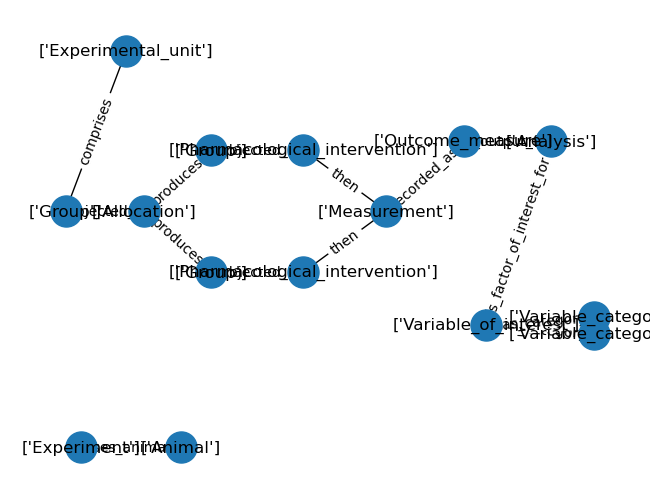

In [8]:
g.visualize()

Now, it's ready to add the UI. This will clearly work fine as a Dropbox folder, but perhaps a web submission option alongside the webform would be useful. Need to figure out best way to surface to both users and staff.